In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os, gzip
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [3]:
DATASET = 'cora'

In [5]:
!python3 deepwalk.py --emb-dim 2 --input data/cora.edgelist.gz --output embs/cora_DeepWalk_2dims.txt.gz

Computing transition probabilities: 100%|█| 2485/2485 [00:00<00:00, 23326.04it/s
Generating walks (CPU: 1): 100%|████████████████| 20/20 [00:00<00:00, 34.23it/s]
Training
Dumping the DeepWalk embeddings


In [6]:
!python3 deepwalk.py --emb-dim 4 --input data/cora.edgelist.gz --output embs/cora_DeepWalk_4dims.txt.gz

Computing transition probabilities: 100%|█| 2485/2485 [00:00<00:00, 23179.03it/s
Generating walks (CPU: 1): 100%|████████████████| 20/20 [00:00<00:00, 31.91it/s]
Training
Dumping the DeepWalk embeddings


In [7]:
!python3 deepwalk.py --emb-dim 8 --input data/cora.edgelist.gz --output embs/cora_DeepWalk_8dims.txt.gz

Computing transition probabilities: 100%|█| 2485/2485 [00:00<00:00, 23771.70it/s
Generating walks (CPU: 1): 100%|████████████████| 20/20 [00:00<00:00, 32.02it/s]
Training
Dumping the DeepWalk embeddings


In [10]:
!python3 dine.py --emb-dim 2 --input embs/cora_DeepWalk_2dims.txt.gz --output embs/cora_DeepWalk_2dims.Dine_2dims.txt.gz

Loading data from embs/cora_DeepWalk_2dims.txt.gz
Loaded data. #shape = (2485, 2)
 #nodes = 2485 
Building model 
After epoch 0, Rec. Loss = 4.92614, Size Loss = 0.00052, Orth. Loss = 0.14114, and Total = 5.06781
After epoch 500, Rec. Loss = 0.01066, Size Loss = 0.00025, Orth. Loss = 0.00130, and Total = 0.01222
After epoch 1000, Rec. Loss = 0.00537, Size Loss = 0.00001, Orth. Loss = 0.00034, and Total = 0.00572
After epoch 1500, Rec. Loss = 0.00483, Size Loss = 0.00000, Orth. Loss = 0.00045, and Total = 0.00528
After epoch 2000, Rec. Loss = 0.00777, Size Loss = 0.00028, Orth. Loss = 0.00252, and Total = 0.01058
Dumping the DINE embeddings
shape (2485, 2)


In [9]:
!python3 dine.py --emb-dim 4 --input embs/cora_DeepWalk_4dims.txt.gz --output embs/cora_DeepWalk_4dims.Dine_4dims.txt.gz

Loading data from embs/cora_DeepWalk_4dims.txt.gz
Loaded data. #shape = (2485, 4)
 #nodes = 2485 
Building model 
After epoch 0, Rec. Loss = 5.11908, Size Loss = 0.00654, Orth. Loss = 0.05739, and Total = 5.18301
After epoch 500, Rec. Loss = 0.02251, Size Loss = 0.00003, Orth. Loss = 0.04833, and Total = 0.07086
After epoch 1000, Rec. Loss = 0.02426, Size Loss = 0.00035, Orth. Loss = 0.05175, and Total = 0.07635
After epoch 1500, Rec. Loss = 0.00919, Size Loss = 0.00001, Orth. Loss = 0.05307, and Total = 0.06227
After epoch 2000, Rec. Loss = 0.00844, Size Loss = 0.00002, Orth. Loss = 0.05360, and Total = 0.06205
Dumping the DINE embeddings
shape (2485, 4)


In [8]:
!python3 dine.py --emb-dim 8 --input embs/cora_DeepWalk_8dims.txt.gz --output embs/cora_DeepWalk_8dims.Dine_8dims.txt.gz

Loading data from embs/cora_DeepWalk_8dims.txt.gz
Loaded data. #shape = (2485, 8)
 #nodes = 2485 
Building model 
After epoch 0, Rec. Loss = 2.72991, Size Loss = 0.01596, Orth. Loss = 0.01945, and Total = 2.76532
After epoch 500, Rec. Loss = 0.00868, Size Loss = 0.00019, Orth. Loss = 0.01884, and Total = 0.02771
After epoch 1000, Rec. Loss = 0.00596, Size Loss = 0.00007, Orth. Loss = 0.01914, and Total = 0.02516
After epoch 1500, Rec. Loss = 0.00508, Size Loss = 0.00006, Orth. Loss = 0.01924, and Total = 0.02439
After epoch 2000, Rec. Loss = 0.01077, Size Loss = 0.00022, Orth. Loss = 0.01931, and Total = 0.03031
Dumping the DINE embeddings
shape (2485, 8)


In [11]:
import networkx as nx

graph = nx.read_weighted_edgelist(f'data/{DATASET}.edgelist.gz')
graph.remove_edges_from(nx.selfloop_edges(graph))
node_name = np.array(list(graph.nodes()))
node_dict = dict(zip(node_name, np.arange(len(node_name))))

In [12]:
import community as community_louvain

community_dict = community_louvain.best_partition(graph, resolution=1, random_state=11)
edge_communities = np.array(['-'.join(map(str, sorted([community_dict[i], community_dict[j]]))) for i,j in graph.edges()])

In [13]:
def get_edge_colors_and_widths(colors, base_thresh, top_edges=None):
    sorted_colors = sorted(colors, reverse=True)
    if top_edges is not None and len(sorted_colors) > top_edges:
        thresh = max(sorted_colors[top_edges - 1], base_thresh)
    else:
        thresh = max(sorted_colors[-1], base_thresh)

    edge_colors = ['grey' if w > thresh else (1, 1, 1, 0) for w in colors]
    # Define edge widths based on threshold, enhancing top x edges
    edge_widths = [(w > thresh) * 2.5 + 0.25 for w in colors]

    return edge_colors, edge_widths

/Users/sreeparnadeb/REIT/NetAudit/netaudit_updated/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


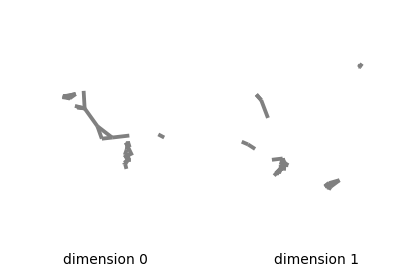

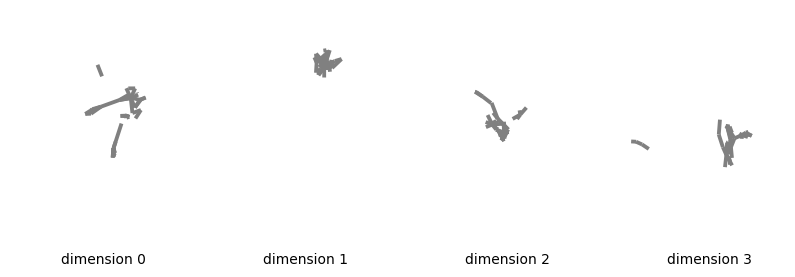

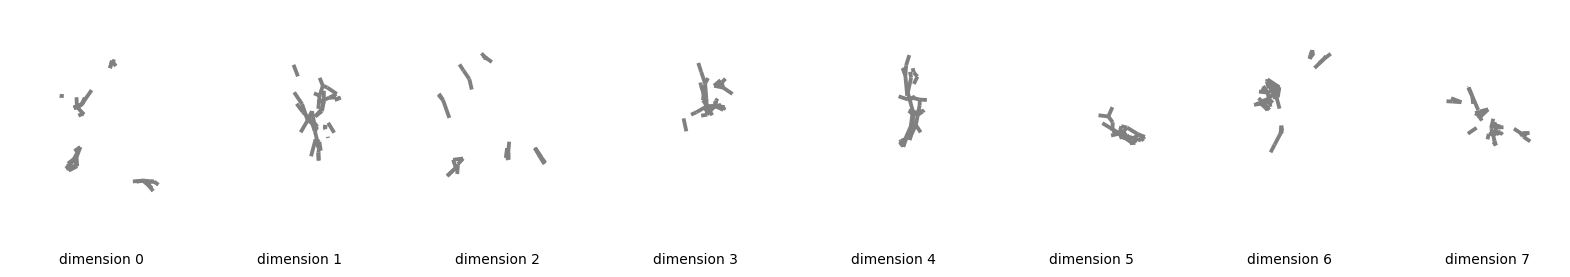

In [14]:
import utils
# Define a base minimum threshold
BASE_THRESH = 1e-9

for D_out in [2,4,8]:
    
    emb_dict = utils.load_embs(f'embs/{DATASET}_DeepWalk_{D_out}dims.Dine_{D_out}dims.txt.gz')
    emb_X = np.array([emb_dict[n] for n in node_name]) 

    i_dims, i_masks, i_labels, i_scores, i_entropies = utils.edge_interpretability_parallel(graph, emb_X,  
                                                                                        edge_communities)

    fig, ax = plt.subplots(1, D_out, figsize=(2.5*D_out, 3))

    ax = ax.ravel()

    for axx in ax:
        axx.axis('off')

    pos = nx.spring_layout(graph, seed=8)

    for dim in range(D_out):

        color = i_masks[dim]
        vmin = min(color)
        vmax = max(color)

        # Node colors remain fully transparent
        node_color = [(0, 0, 0, 0)]

        # Get edge colors and widths
        edge_colors, edge_widths = get_edge_colors_and_widths(color, BASE_THRESH, top_edges=50)

        nx.draw(graph, pos, node_color=node_color, edge_color=edge_colors, 
                width=edge_widths, node_size=2, with_labels=False, vmin=vmin, vmax=vmax, ax=ax[dim])

        ax[dim].text(x=0.3, y=-0.1, s='dimension '+str(dim), transform=ax[dim].transAxes, fontsize=10)

plt.show()